# Problem statement:-

E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [2]:
#Importing the data set
df = pd.read_excel(r"C:\Users\abhic\Downloads\Customer_retention_dataset- (1)\Customer_retention_dataset\customer_retention_dataset.xlsx")

In [3]:
df

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

In [4]:
df.shape

(269, 71)

In [5]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [6]:
df.head()


1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome       

In [7]:
# Removing tab spaces
from string import digits

df.columns = df.columns.str.replace('\t','')

In [8]:
# Removing digits
remove_digits = str.maketrans('', '', digits)
df.columns = df.columns.str.translate(remove_digits)

In [9]:
# Removing leading and trailling spaces
df.columns = df.columns.str.strip()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                     --------------  ----- 
 0   Gender of respondent                                                                                       269 non-null    object
 1   How old are you?                                                                                           269 non-null    object
 2   Which city do you shop online from?                                                                        269 non-null    object
 3   What is the Pin Code of where you shop online from?                                                        269 non-null    int64 
 4   Since How Long You are Shopping Online ?                                        

In [11]:
df.isnull().sum()

Gender of respondent                                                                                         0
How old are you?                                                                                             0
Which city do you shop online from?                                                                          0
What is the Pin Code of where you shop online from?                                                          0
Since How Long You are Shopping Online ?                                                                     0
How many times you have made an online purchase in the past  year?                                           0
How do you access the internet while shopping on-line?                                                       0
Which device do you use to access the online shopping?                                                       0
What is the screen size of your mobile device?                                                               0
W

Here we can see there are no null values present in data.

In [12]:
#cheking data types
df.dtypes

Gender of respondent                                                                                         object
How old are you?                                                                                             object
Which city do you shop online from?                                                                          object
What is the Pin Code of where you shop online from?                                                           int64
Since How Long You are Shopping Online ?                                                                     object
How many times you have made an online purchase in the past  year?                                           object
How do you access the internet while shopping on-line?                                                       object
Which device do you use to access the online shopping?                                                       object
What is the screen size of your mobile device?                          

Except pincode all columns are object data type.

In [13]:
df.describe()

What is the Pin Code of where you shop online from?
count                                         269.000000  
mean                                       220465.747212  
std                                        140524.341051  
min                                        110008.000000  
25%                                        122018.000000  
50%                                        201303.000000  
75%                                        201310.000000  
max                                        560037.000000

In [14]:
# Checking the is null values in the data set using isnull function
df.isnull().sum().any() 

False

Now we can see there are no null values present in our dataset.


In [15]:
#Checking the unique values 
df.nunique()

Gender of respondent                                                                                          2
How old are you?                                                                                              5
Which city do you shop online from?                                                                          11
What is the Pin Code of where you shop online from?                                                          39
Since How Long You are Shopping Online ?                                                                      5
How many times you have made an online purchase in the past  year?                                            6
How do you access the internet while shopping on-line?                                                        4
Which device do you use to access the online shopping?                                                        4
What is the screen size of your mobile device?                                                          

In [20]:
from sklearn.preprocessing import LabelEncoder

df1 = df.copy()
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()   

Gender of respondent  How old are you?  \
0                     1                 1   
1                     0                 0   
2                     0                 0   
3                     1                 0   
4                     0                 0   

   Which city do you shop online from?  \
0                                    2   
1                                    2   
2                                    4   
3                                    6   
4                                    0   

   What is the Pin Code of where you shop online from?  \
0                                                  1     
1                                                  5     
2                                                 23     
3                                                 11     
4                                                 31     

   Since How Long You are Shopping Online ?  \
0                                         3   
1                                         3   
2                                         2   
3                                         2   
4                                         1   

   How many times you have made an online purchase in the past  year?  \
0                                                  2                    
1                                                  3                    
2                                                  3                    
3                                                  5                    
4                                                  0                    

   How do you access the internet while shopping on-line?  \
0                                                  0        
1                                                  3        
2                                                  1        
3                                                  1        
4                                                  3        

   Which device do you use to access the online shopping?  \
0                                                  0        
1                                                  2        
2                                                  2        
3                                                  2        
4                                                  2        

   What is the screen size of your mobile device?  \
0                                               3   
1                                               0   
2                                               2   
3                                               2   
4                                               0   

   What is the operating system (OS) of your device?  \
0                                                  2   
1                                                  1   
2                                                  0   
3                                                  1   
4                                                  1   

   What browser do you run on your device to access the website?  \
0                                                  0               
1                                                  0               
2                                                  0               
3                                                  3               
4                                                  3               

   Which channel did you follow to arrive at your favorite online store for the first time?  \
0                                                  2                                          
1                                                  2                                          
2                                                  2                                          
3                                                  2                                          
4                                                  0                                          

   After first visit, how do you reach

In [21]:
# Checking correlation
df.corr()

Gender of respondent  \
Gender of respondent                                            1.000000   
How old are you?                                                0.046169   
Which city do you shop online from?                             0.080912   
What is the Pin Code of where you shop online f...             -0.289628   
Since How Long You are Shopping Online ?                       -0.057096   
How many times you have made an online purchase...              0.077876   
How do you access the internet while shopping o...             -0.309029   
Which device do you use to access the online sh...              0.061673   
What is the screen size of your mobile device?                  0.028794   
What is the operating system (OS) of your device?              -0.019243   
What browser do you run on your device to acces...              0.071385   
Which channel did you follow to arrive at your ...             -0.079834   
After first visit, how do you reach the online ...             -0.189867   
How much time do you explore the e- retail stor...             -0.042602   
What is your preferred payment Option?                          0.073649   
How frequently do you abandon (selecting an ite...              0.149324   
Why did you abandon the “Bag”, “Shopping Cart”?                 0.090947   
The content on the website must be easy to read...             -0.266768   
Information on similar product to the one highl...             -0.213973   
Complete information on listed seller and produ...             -0.182851   
All relevant information on listed products mus...             -0.078158   
Ease of navigation in website                                  -0.147025   
Loading and processing speed                                   -0.065858   
User friendly Interface of the website                         -0.288620   
Convenient Payment methods                                     -0.272860   
Trust that the online retail store will fulfill...             -0.113377   
Empathy (readiness to assist with queries) towa...             -0.201347   
Being able to guarantee the privacy of the cust...             -0.138322   
Responsiveness, availability of several communi...             -0.341420   
Online shopping gives monetary benefit and disc...             -0.024235   
Enjoyment is derived from shopping online                       0.140165   
Shopping online is convenient and flexible                     -0.006391   
Return and replacement policy of the e-tailer i...             -0.171001   
Gaining access to loyalty programs is a benefit...              0.091378   
Displaying quality Information on the website i...              0.234210   
User derive satisfaction while shopping on a go...             -0.240111   
Net Benefit derived from shopping online can le...             -0.226020   
User satisfaction cannot exist without trust                    0.039781   
Offering a wide variety of listed product in se...             -0.059890   
Provision of complete and relevant product info...              0.011710   
Monetary savings                                               -0.147349   
The Convenience of patronizing the online retailer              0.182842   
Shopping on the website gives you the sense of ...             -0.050610   
Shopping on your preferred e-tailer enhances yo...             -0.035803   
You feel gratification shopping on your favorit...             -0.207587   
Shopping on the website helps you fulfill certa...             -0.050009   
Getting value for money spent                                   0.123718   
From the following, tick any (or all) of the on...              0.091958   
Easy to use website or application                              0.083668   
Visual appealing web-page layout                                0.022497   
Wild variety of product on offer                               -0.011826   
Complete, relevant description information of p...              0.122465   
Fast loading website spe

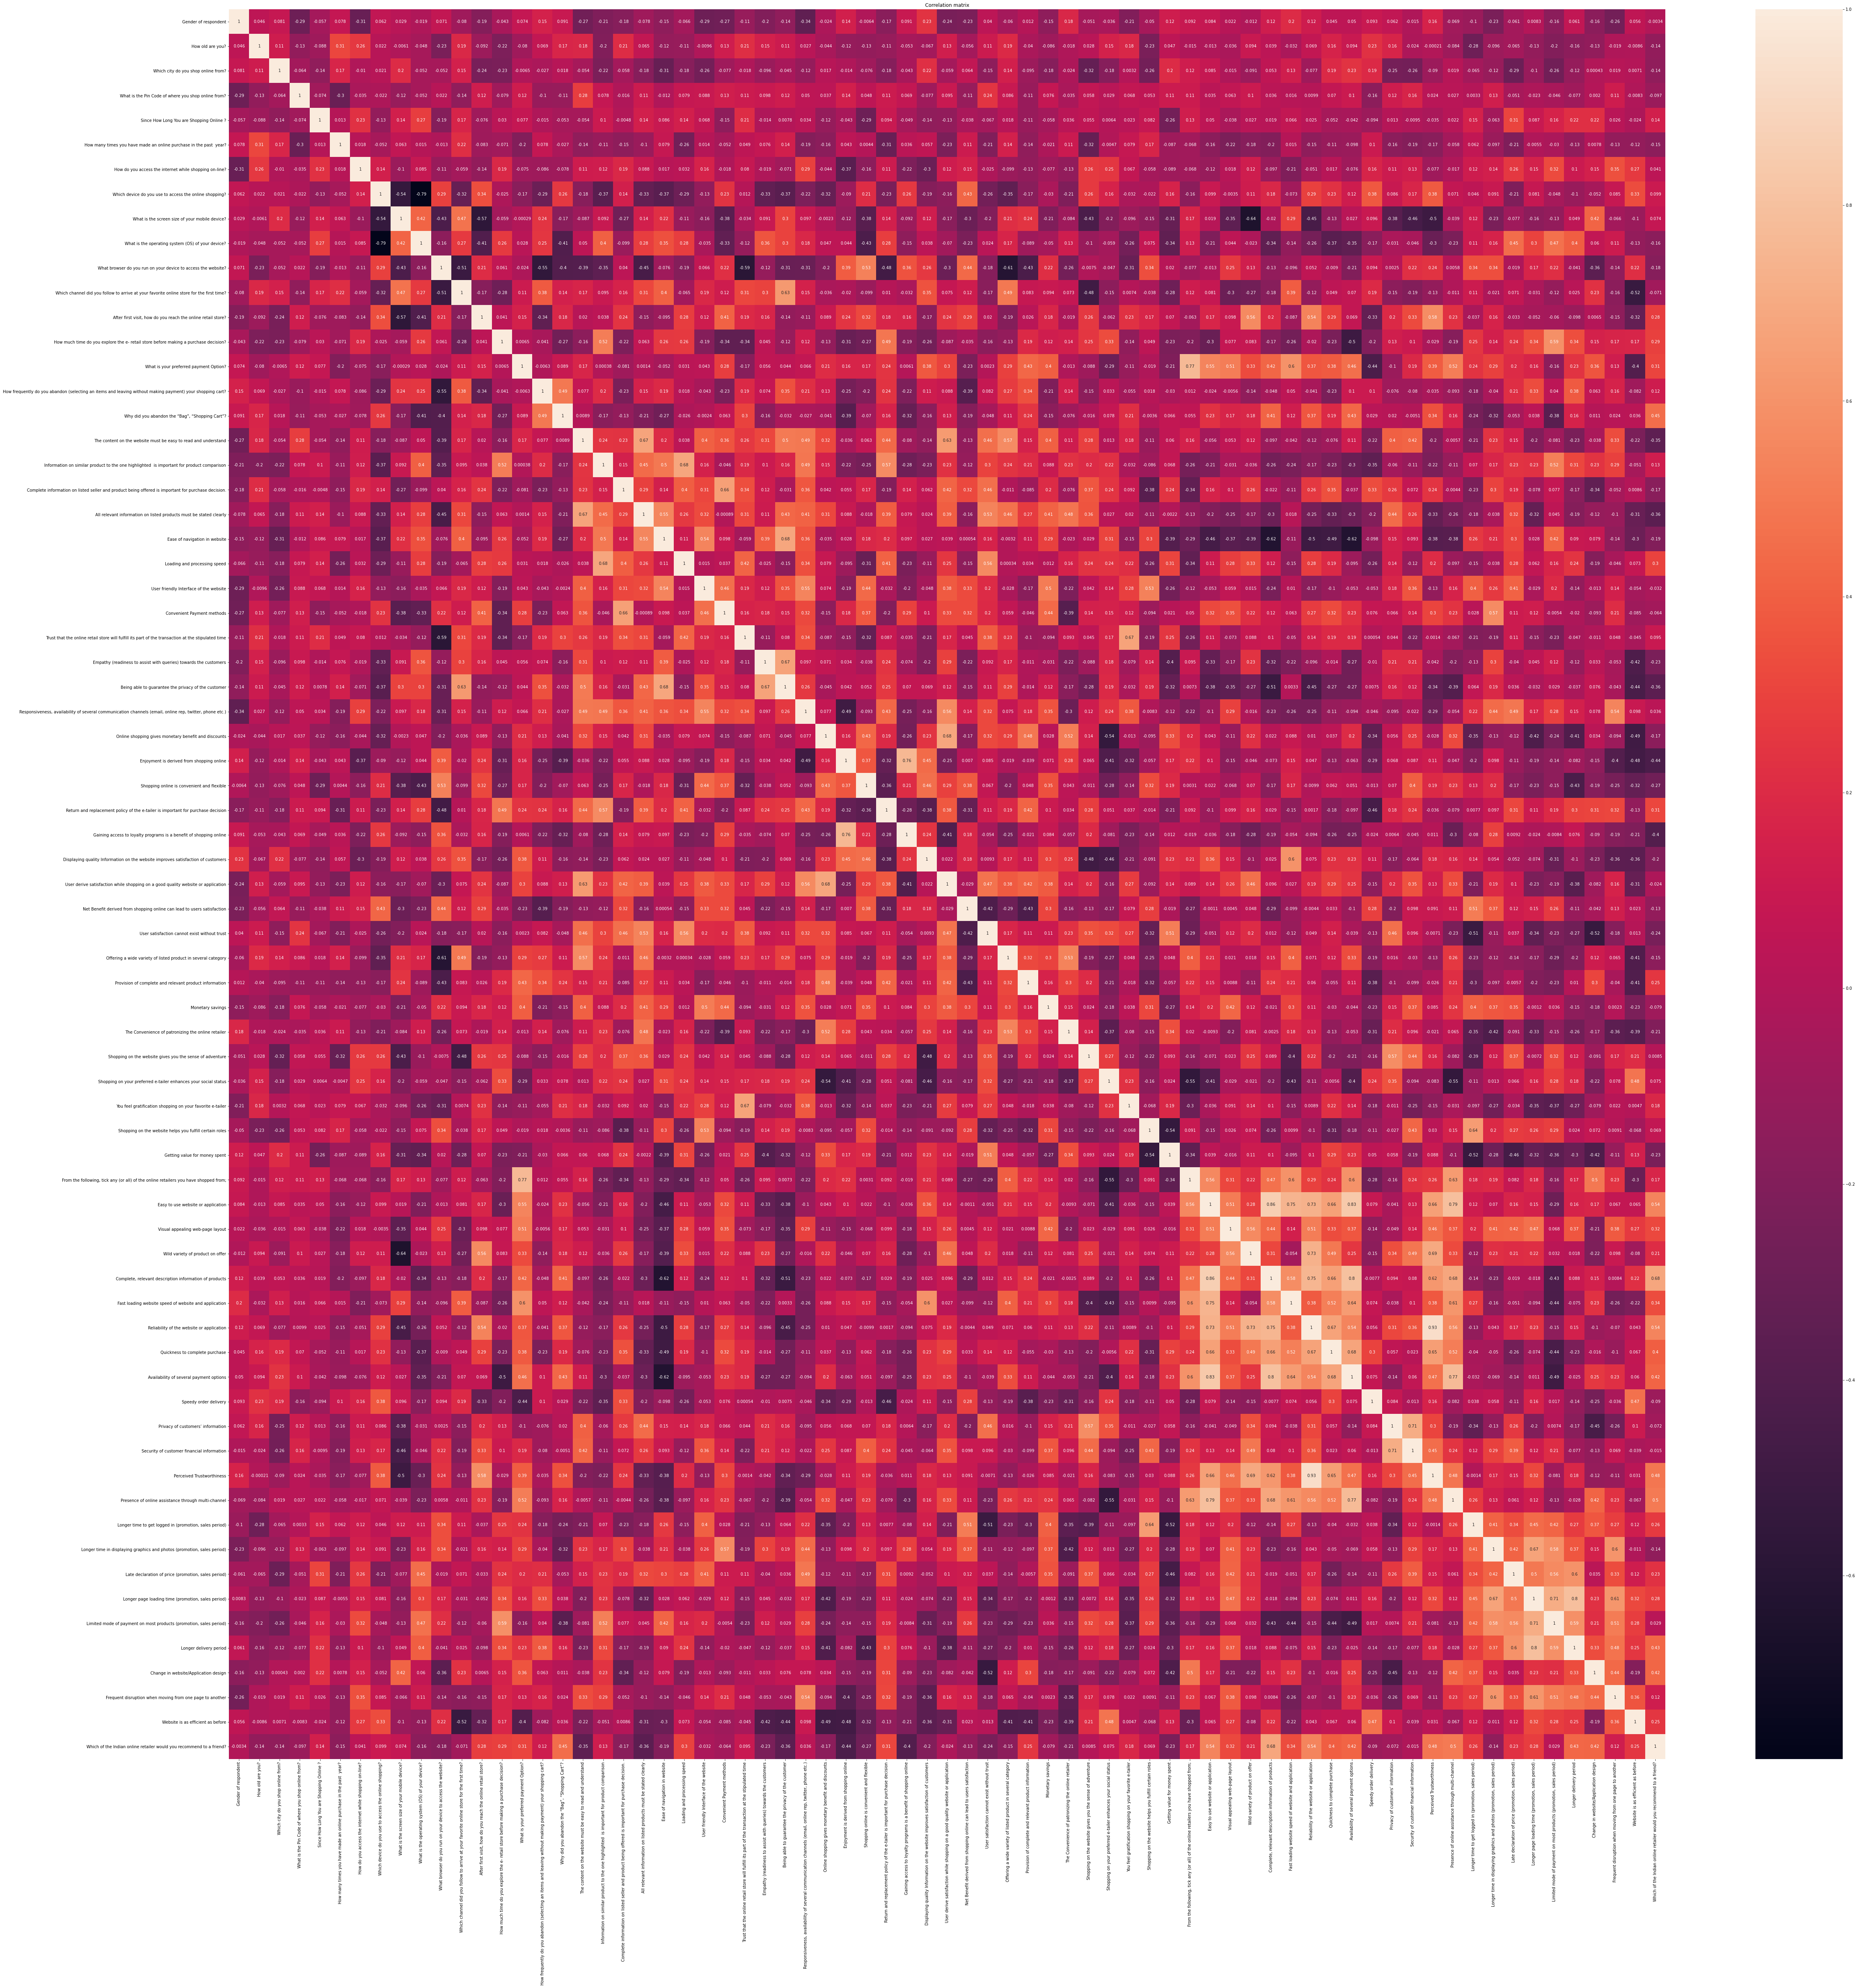

In [22]:
#plotting correlation Graph
plt.figure(figsize=[80,80])

#plot the correlation matrix
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation matrix")
plt.show()

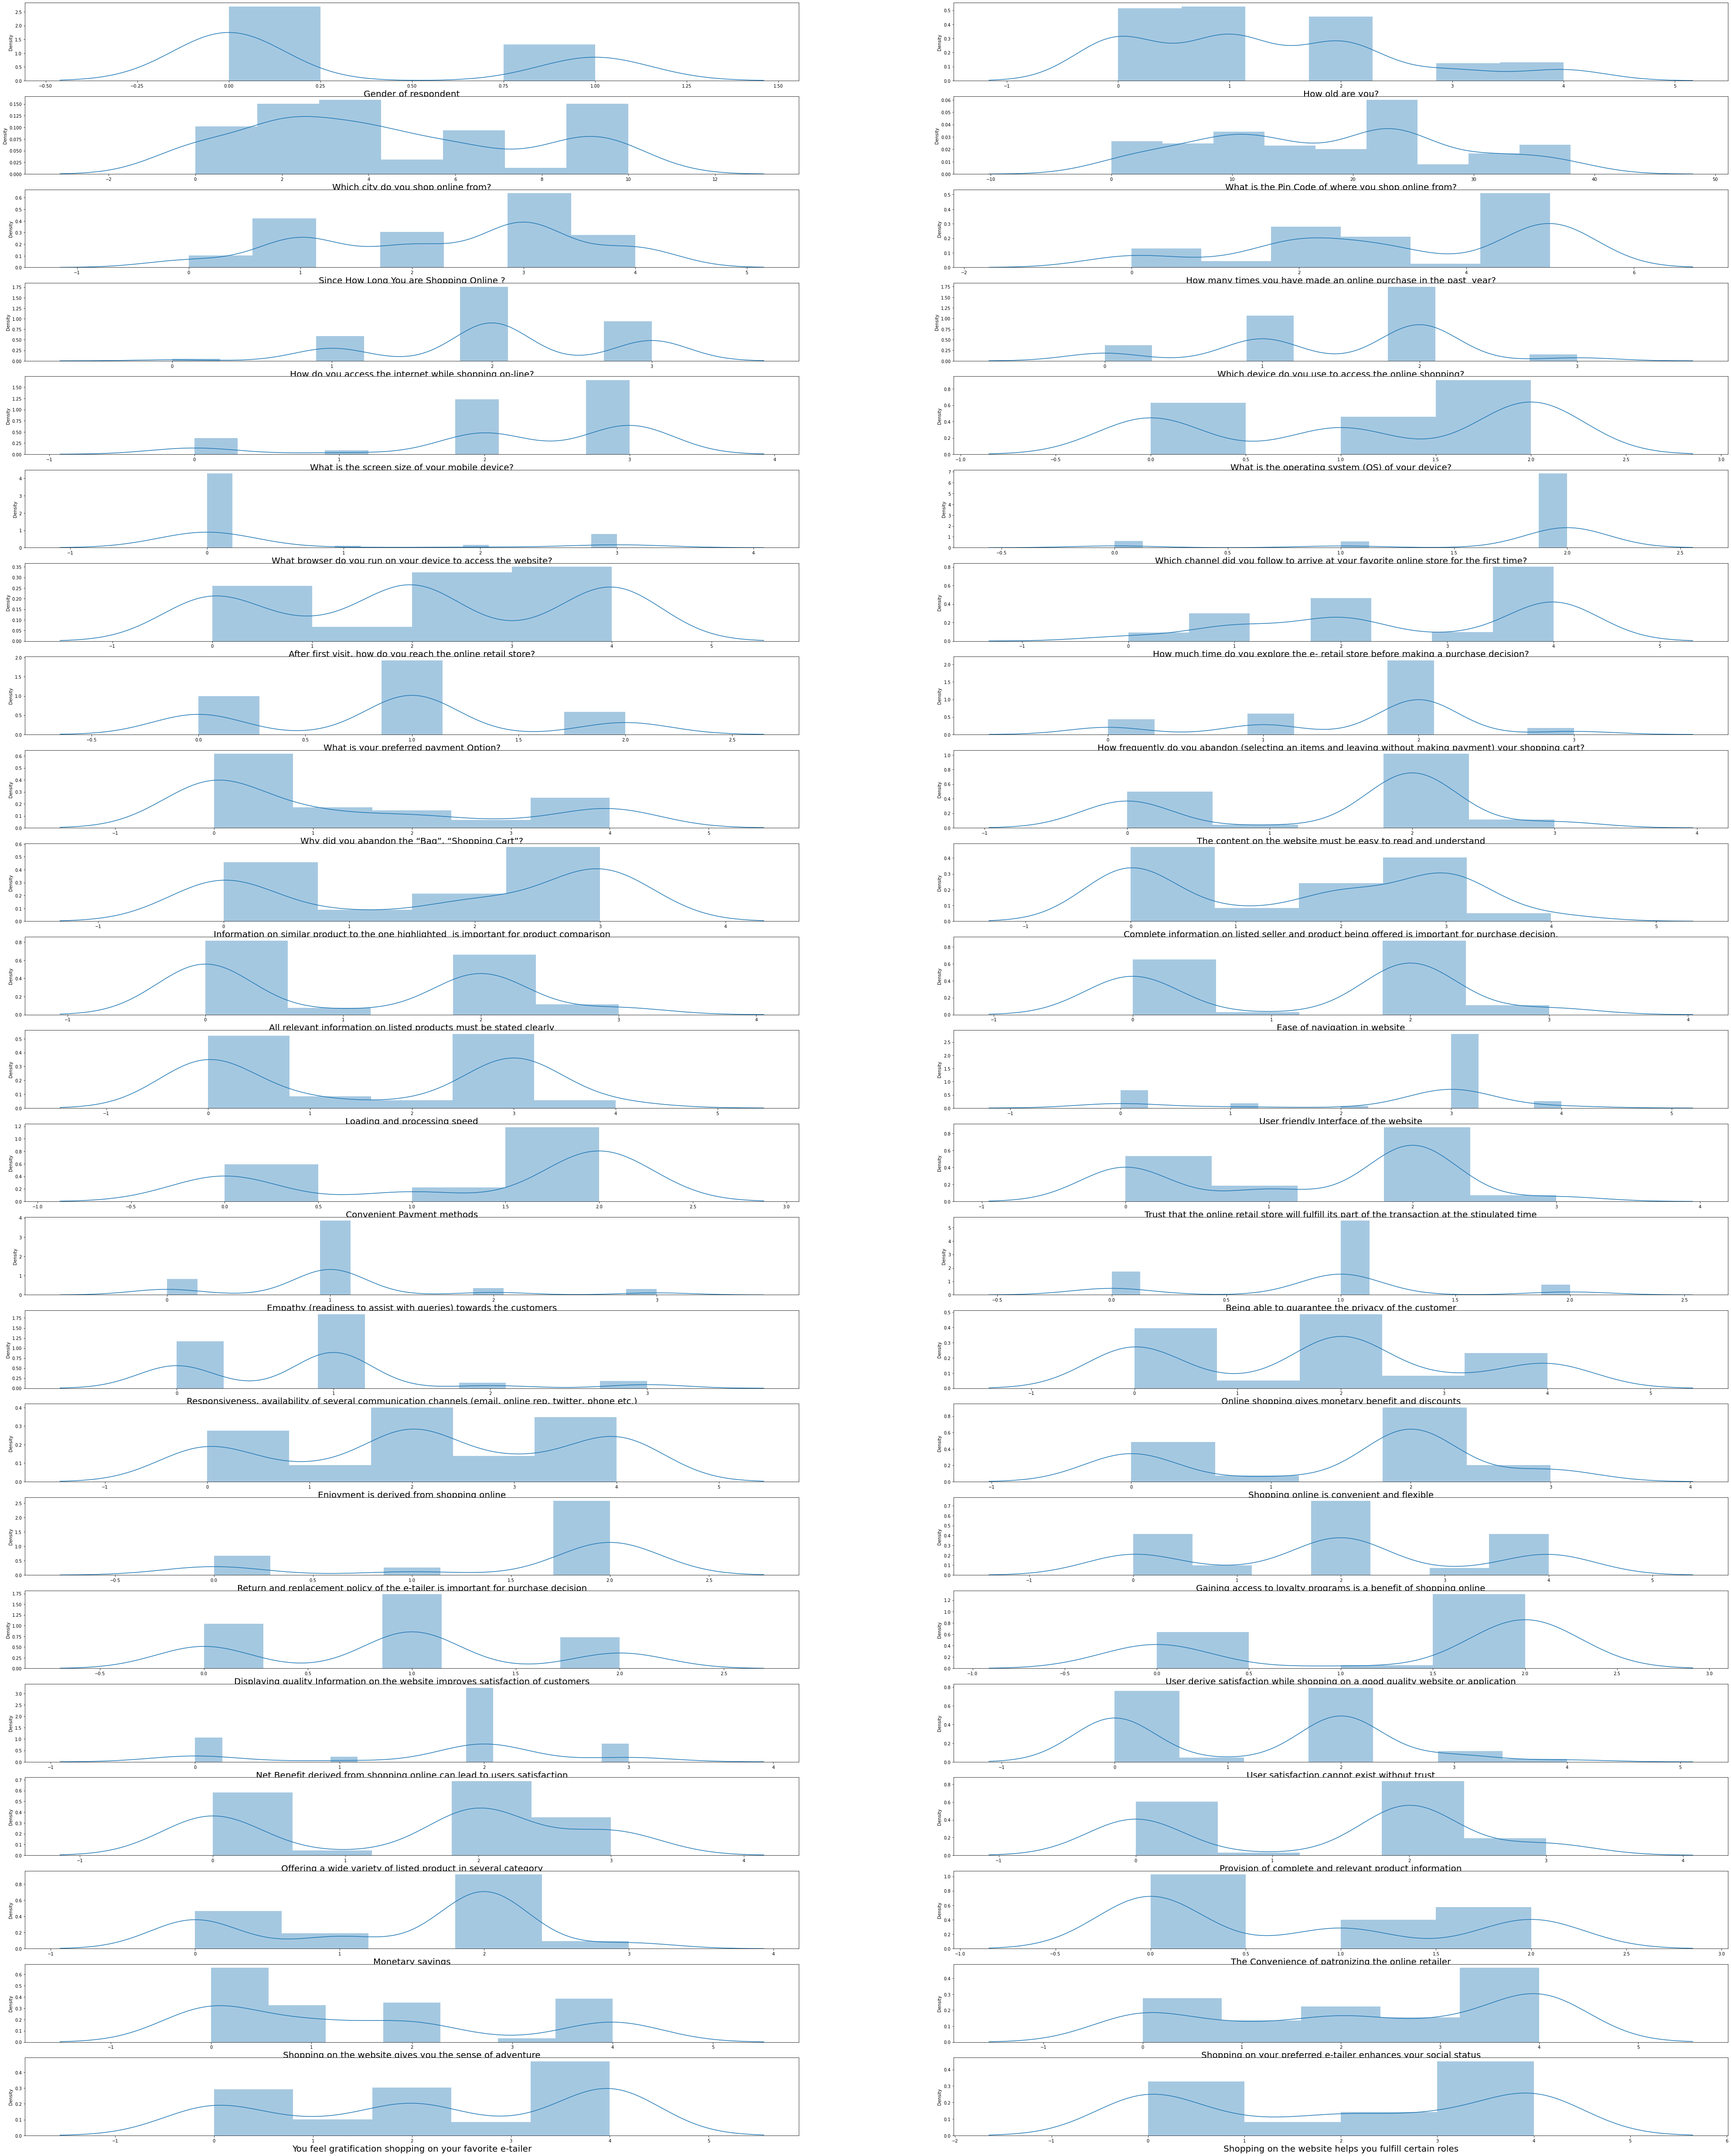

In [23]:
#Checking the data distribution among all the columns

plt.figure(figsize=(70,90))
plotnumber=1

for column in df:
    if plotnumber<=46:
        ax=plt.subplot(23,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

# Univariate anaylisis

In [24]:
personal_information=['Gender of respondent','How old are you?','Which city do you shop online from?',
               'What is the Pin Code of where you shop online from?','Since How Long You are Shopping Online ?',
                   'How many times you have made an online purchase in the past  year?']

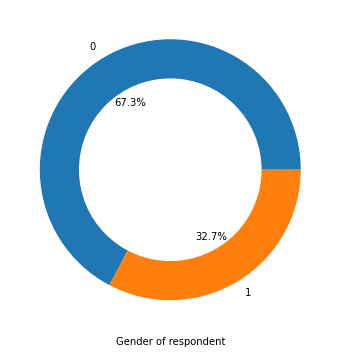

<Figure size 432x288 with 0 Axes>

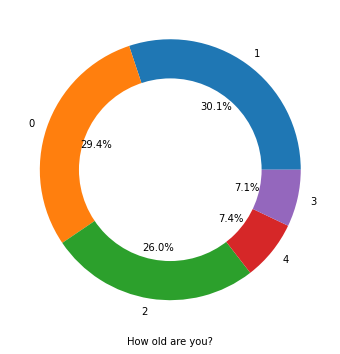

<Figure size 432x288 with 0 Axes>

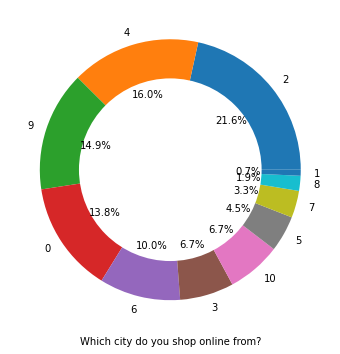

<Figure size 432x288 with 0 Axes>

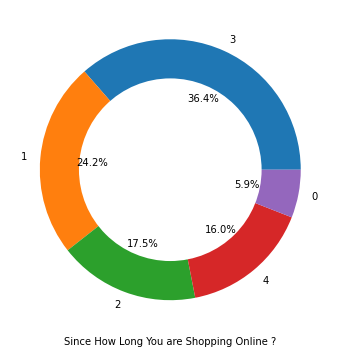

<Figure size 432x288 with 0 Axes>

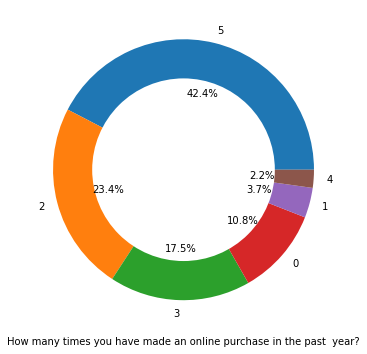

<Figure size 432x288 with 0 Axes>

In [25]:
for i in personal_information:
    if i!='What is the Pin Code of where you shop online from?':
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

1 -There are 67% of women who shop online from very long time.
2 - Maximum people shop 10 times in a year.
3 - 42.4% of customer use online shoping less than 10 times in a year.
4 - 17.5% Customers are using online shoping 41 times in a year.


In [26]:
# Converting years into numbers which will help us to analize more better
dict={'31-40 times':35,'41 times and above':45,'Less than 10 times':5,'11-20 times':15,'21-30 times':25}
df['Average times made an online purchase']=df['How many times you have made an online purchase in the past  year?'].replace(dict)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

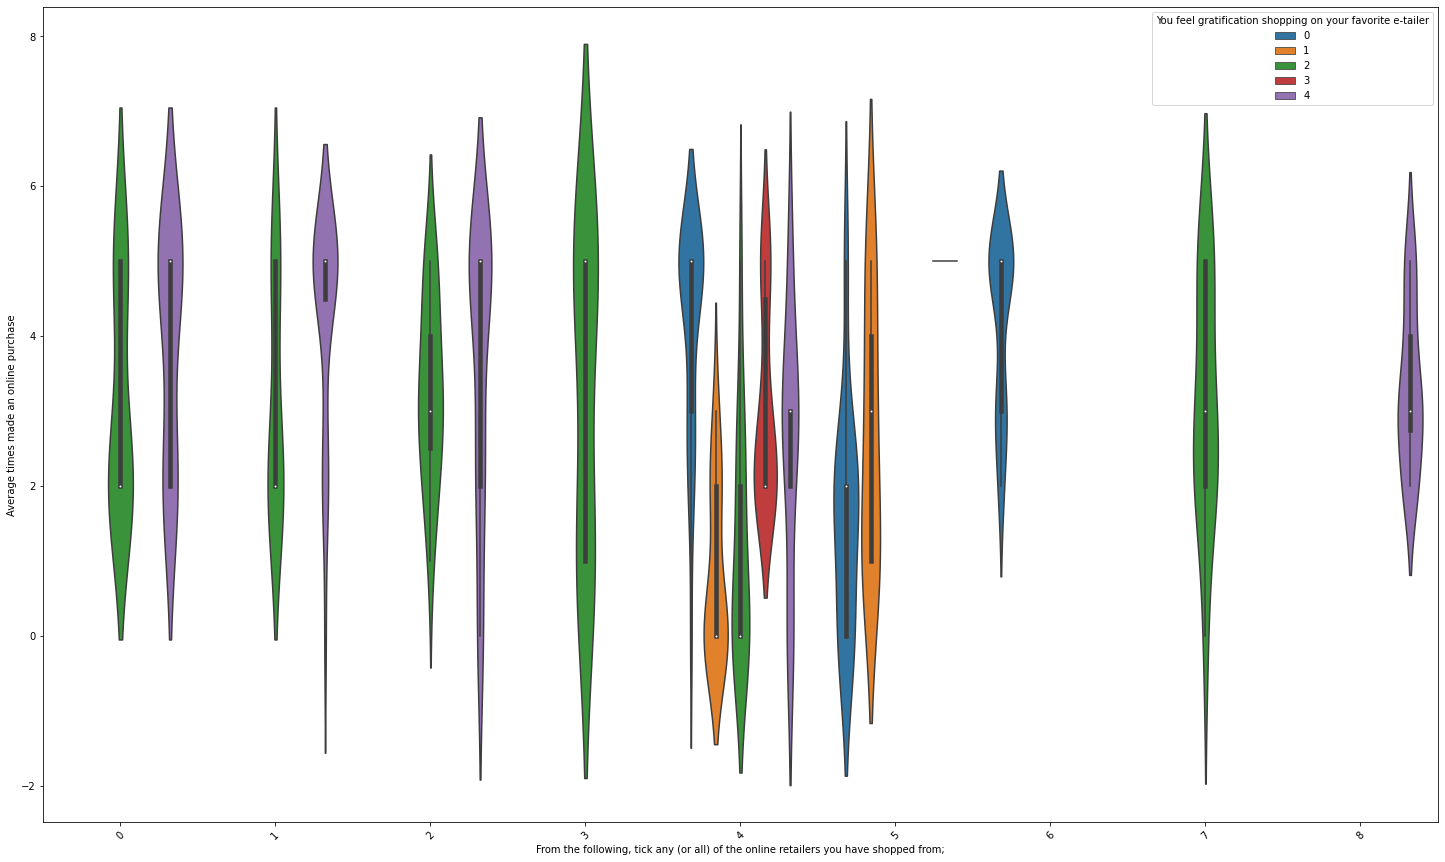

In [27]:
#Plotting violin plot for the visualization
plt.figure(figsize=(25,15))
sns.violinplot(df['From the following, tick any (or all) of the online retailers you have shopped from;'],
               df['Average times made an online purchase'],hue=df['You feel gratification shopping on your favorite e-tailer'])
plt.xticks(rotation=45)

We can see here that the people who shop from Flipkart, Amazon and Paytm are more satisfied then other who shop from multiple website.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

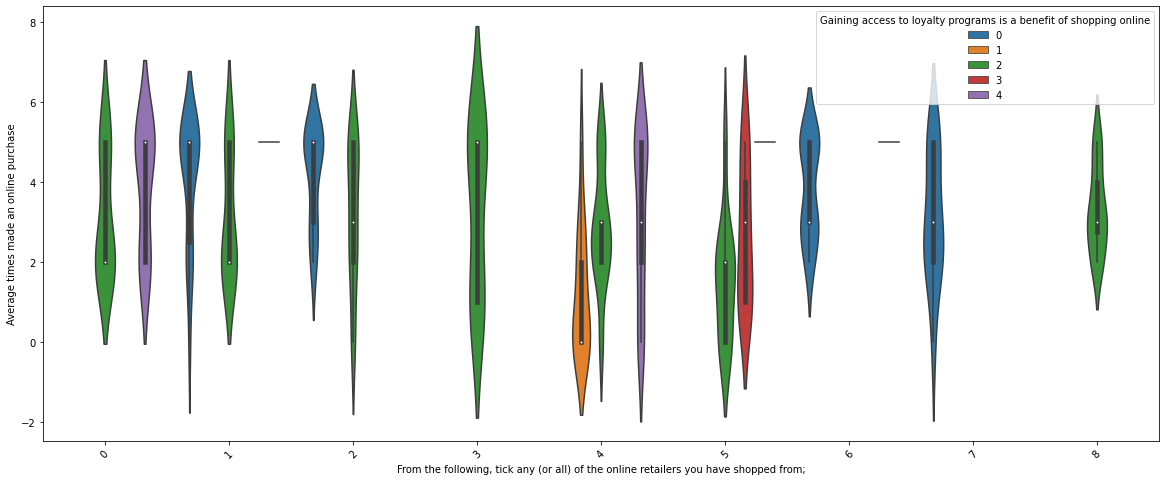

In [28]:
plt.figure(figsize=(20,8))
sns.violinplot(df['From the following, tick any (or all) of the online retailers you have shopped from;'],
               df['Average times made an online purchase'],hue=df['Gaining access to loyalty programs is a benefit of shopping online'])
plt.xticks(rotation=45)

Here we can see that people who shop from Paytm and Amazon are getting more benefits.

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

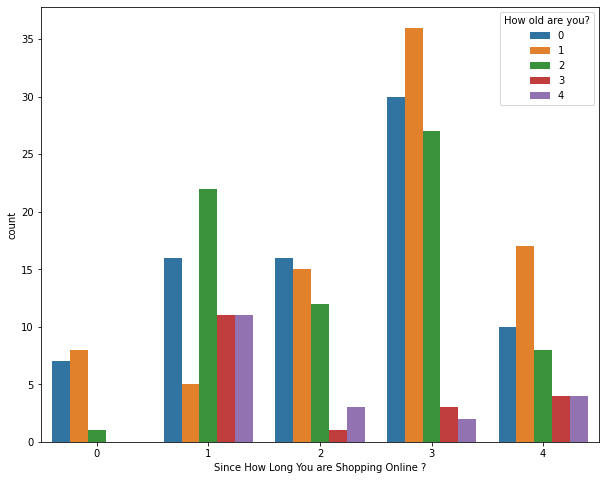

In [29]:
# Plotting graph for online retailing 
plt.figure(figsize=(10,8))
sns.countplot(df['Since How Long You are Shopping Online ?'],hue=df['How old are you?'])

In [30]:
#Converting years to numbers 
df['Since How Long You are Shopping Online ?'].unique()

array([3, 2, 1, 4, 0])

In [31]:
dict={'Above 4 years':4.5,'3-4 years':3.5,'2-3 years':2.5,'1-2 years':1.5,'Less than 1 year':0.5}
df['Average years of shopping online']=df['Since How Long You are Shopping Online ?'].replace(dict)

In [32]:
df['Which city do you shop online from?'].unique()


array([ 2,  4,  6,  0,  9, 10,  8,  5,  7,  3,  1])

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

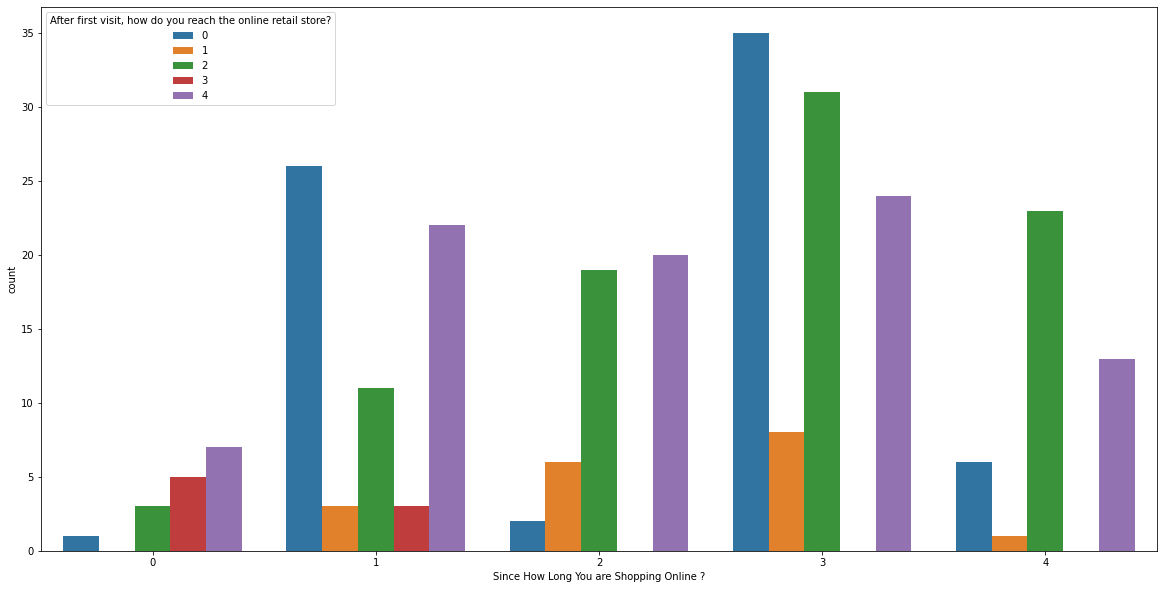

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(df['Since How Long You are Shopping Online ?'],
              hue=df['After first visit, how do you reach the online retail store?'])

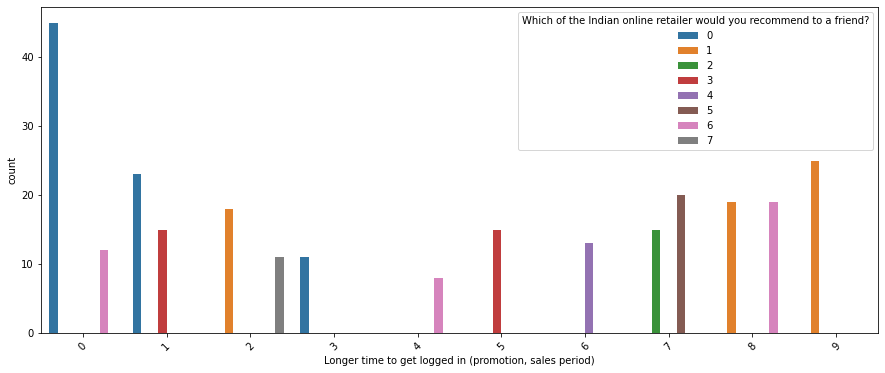

<Figure size 432x288 with 0 Axes>

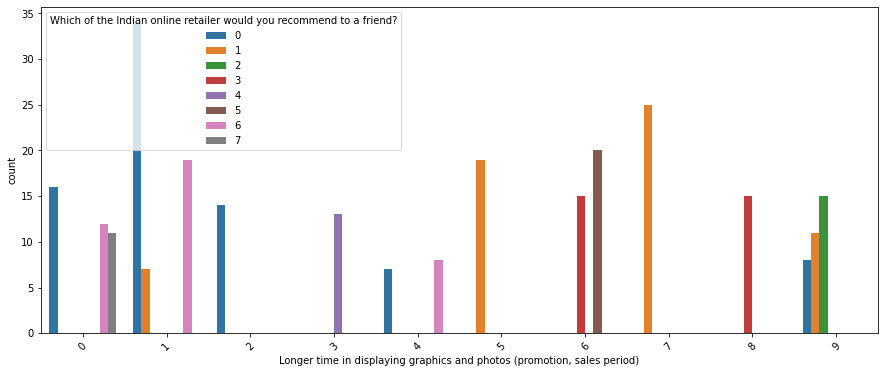

<Figure size 432x288 with 0 Axes>

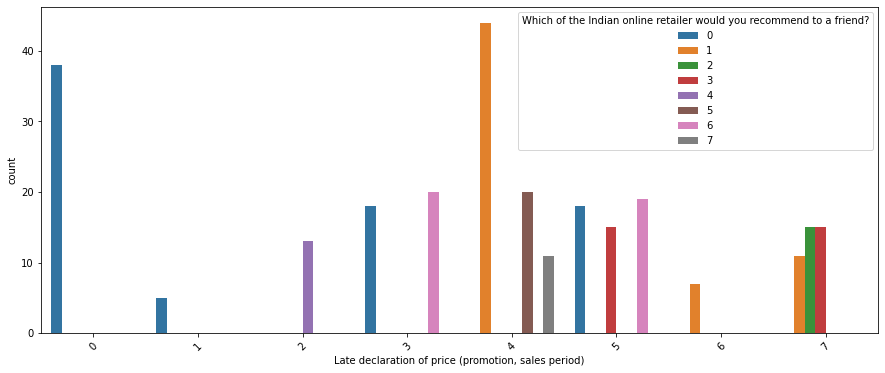

<Figure size 432x288 with 0 Axes>

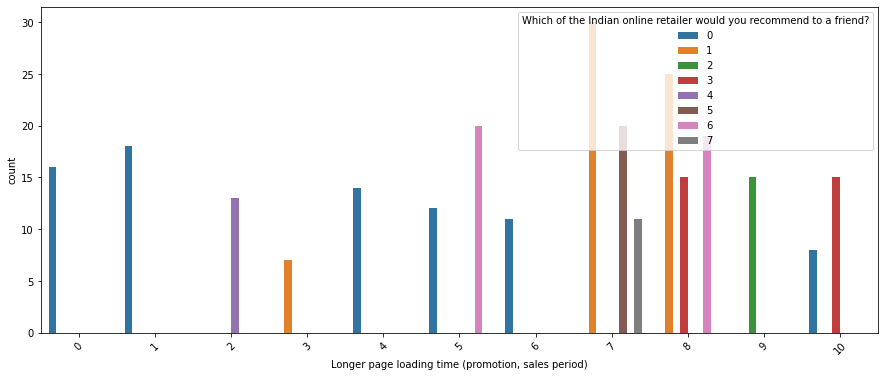

<Figure size 432x288 with 0 Axes>

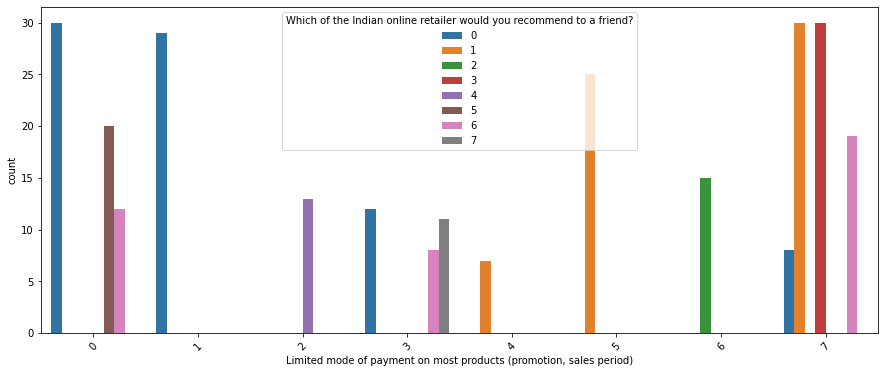

<Figure size 432x288 with 0 Axes>

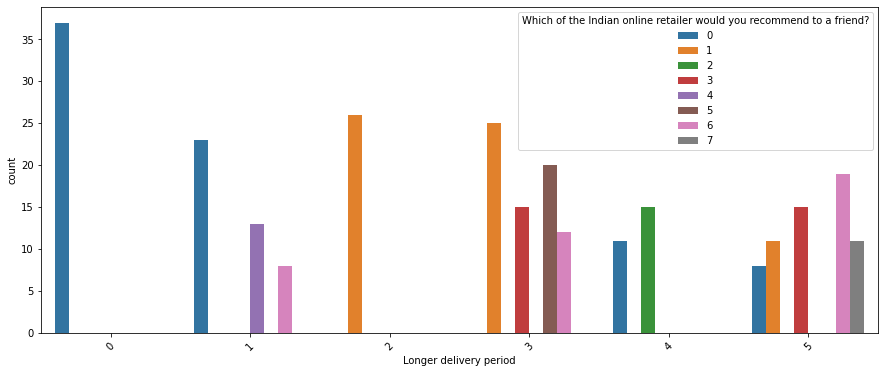

<Figure size 432x288 with 0 Axes>

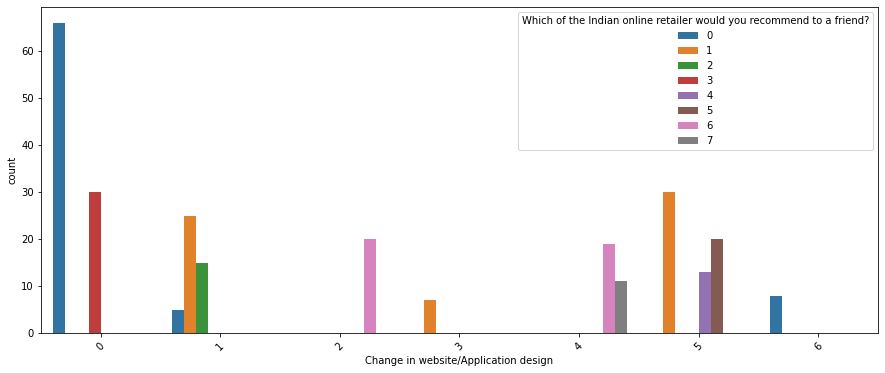

<Figure size 432x288 with 0 Axes>

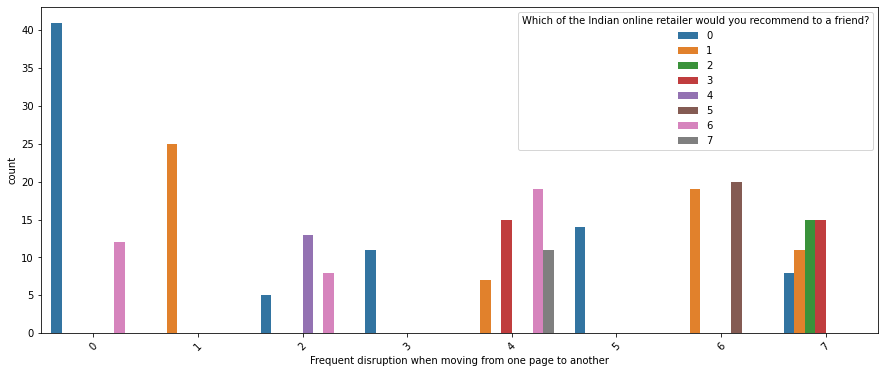

<Figure size 432x288 with 0 Axes>

In [36]:
#Collecting all the negative remarks about a brand
bad=['Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another']
for i in bad:
        plt.figure(figsize=(15,6))
        sns.countplot(df[i],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
        plt.xticks(rotation=45)
        plt.figure()

Customers are more loyal towards amazon flipkart and paytm then also some of the customer have given negavtive feedback and also refer to .